averdegree is: 3.92
69
127
66
69


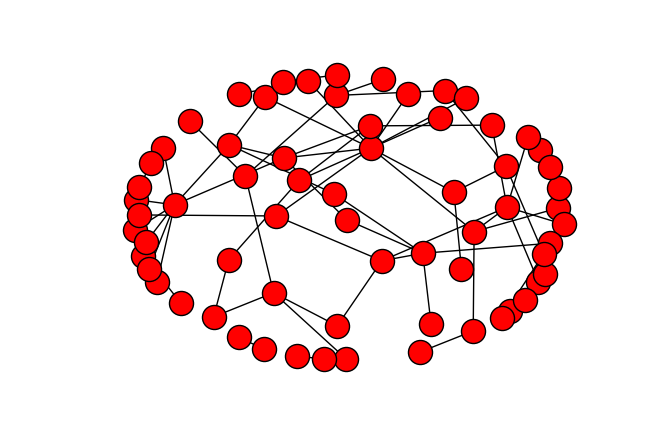

In [253]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.random_graphs.barabasi_albert_graph(100,2) 
averdegree = len(G.edges())/float(len(G))*2
print 'averdegree is:',averdegree
# linkList = nx.to_edgelist(G)
# print linkList
p = 0.4

reservedEdge = []
changedEdge = []
for edge in G.edges():
    if random.random() <= p:
        reservedEdge.append(edge)
    else:
        changedEdge.append(edge)

print len(reservedEdge)
print len(changedEdge)

graph = nx.Graph()
graph.add_edges_from(reservedEdge)


# degree = nx.degree_histogram(G)
# print degree
# x = range(len(degree))
# y = [z/float(sum(degree)) for z in degree]
# plt.loglog(x,y,'r-o')


print len(graph.nodes())
print len(graph.edges())
# layout types
layout =  ['circular_layout',
           'random_layout',
           'shell_layout',
           'spring_layout',
           'spectral_layout',
           'fruchterman_reingold_layout']

nx.draw(graph,pos=nx.spring_layout(graph))
plt.show()

# Compare Temporal Scale-Free Network similarity

network_1 has 79600 links
network_1 has 4000 nodes
network_1 density is: 0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
0.00995248812203
ave: 0.0353179691561


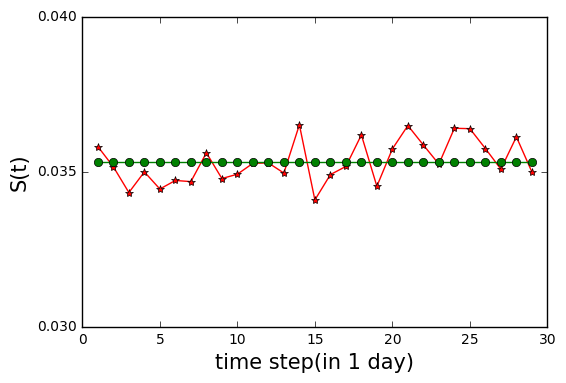

In [298]:
# -*- coding: utf-8 -*-
import time
import math
import json
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

temporalNetFile1 = nx.random_graphs.barabasi_albert_graph(4000,20) 
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_1 has %s links"%(len(temporalNetFile1.edges()))
print "network_1 has %s nodes"%(len(Net1))
print "network_1 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
for i in range(2,31):    
    temporalNetFile = nx.random_graphs.barabasi_albert_graph(4000,20)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    print nx.density(temporalNetFile)
    templink = []
    for n, neighbors in tempNet.iteritems(): 
        for u in neighbors:
            templink.append("%s_%s"%(n,u))
#     print "network_%s has %s links"%(i,len(set(templink)))  

    tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
#     tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
    commonRatio.append(tempRatio)
    lastLink = templink

ave = sum(commonRatio)/len(commonRatio)
print 'ave:',ave
    
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'r-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'g-o')

# ax.legend(loc="best", fontsize=12)
ax.set_xlabel("time step(in 1 day)",fontsize=15)
ax.set_ylabel("S(t)",fontsize=15)
ax.set_yticks(np.arange(0.03,0.041,0.005))
# ax.set_xticks(np.arange(0,60,5))
plt.show()

# Compare Activity Driven Temporal Network similarity

network_1 has 2919 links
network_1 has 5000 nodes
network_1 density is: 0.000233566713343
0.000234286857371
0.000229965993199
0.000233326665333
0.000225885177035
0.000236687337467
0.000233806761352
0.000223484696939
0.000221324264853
0.000221564312863
0.000224204840968
0.000237647529506
0.000215083016603
0.000224444888978
0.000226365273055
0.000225165033007
0.000223724744949
0.000222764552911
0.000223484696939
0.000235967193439
0.000224204840968
0.000230446089218
0.000229965993199
0.000233326665333
0.00021700340068
0.000225165033007
0.000216523304661
0.000217963592719
0.000226365273055
0.000246289257852
0.000219883976795
0.000232126425285
0.000226845369074
0.000225165033007
0.000225645129026
0.000225405081016
0.000228045609122
0.000225885177035
0.00021700340068
0.000222044408882
0.000233806761352
0.000217723544709
0.00023524704941
0.000229725945189
0.000233806761352
0.000221804360872
0.000225645129026
0.000216523304661
0.000214122824565
0.000227325465093
ave: 0.000237920236545


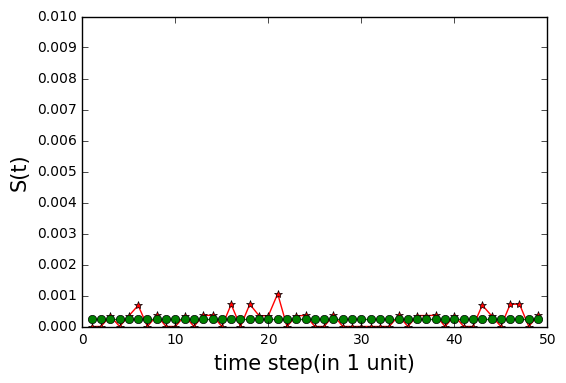

In [85]:
# -*- coding: utf-8 -*-
import random
import networkx as nx
import matplotlib.pyplot as plt

# generate powerlaw random number (Inverse Transform Method)
def powerlaw_num(v,xmin=0.01):
    x = random.random()
    return (xmin**(1-v)-(xmin**(1-v)-1)*x)**(1./(1-v))

def init_activityDriven(N=1000, m=4):
    """"
    Parameters
    ----------
    N :   nodes
    m :   rewiring links
    """
    dt = 1    # active slot
    eta = 10  # rescaling factor , ai = eta * xi

    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        xi = powerlaw_num(3, 0.01)  # node's activated prob belongs to F(x)=x**(-3)
        if random.random() <= eta * xi * dt:
            for mi in range(m):
                j = random.choice(range(N))
                while j == i or G.has_edge(i, j):
                    j = random.choice(range(N))
                G.add_edge(i, j)
    return G  # return a graph object
########################################################################################
N = 5000
m = 3
T = 50

temporalNetFile1 = init_activityDriven(N,m) 
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_1 has %s links"%(len(temporalNetFile1.edges()))
print "network_1 has %s nodes"%(len(Net1))
print "network_1 density is:",nx.density(temporalNetFile1)

# calculate network links overlap
commonRatio = []
lastLink = link1
for i in range(2,T+1):    
    temporalNetFile = init_activityDriven(N,m) 
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    print nx.density(temporalNetFile)
    templink = []
    for n, neighbors in tempNet.iteritems(): 
        for u in neighbors:
            templink.append("%s_%s"%(n,u))
#     print "network_%s has %s links"%(i,len(set(templink)))  

    tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
#     tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
    commonRatio.append(tempRatio)
    lastLink = templink

ave = sum(commonRatio)/len(commonRatio)
print 'ave:',ave
    
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'r-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'g-o')

# ax.legend(loc="best", fontsize=12)
ax.set_xlabel("time step(in 1 unit)",fontsize=15)
ax.set_ylabel("S(t)",fontsize=15)
ax.set_yticks(np.arange(0.0,0.011,0.001))
# ax.set_xticks(np.arange(0,60,5))
plt.show()

# Compare Activity Driven Temporal Network similarity (With Meomory)

network_1 has 1908 links
network_1 has 5000 nodes
network_1 density is: 0.000152670534107
0.000143308661732
0.00013674734947
0.000137387477495
0.000142348469694
0.000135067013403
0.000134986997399
0.000131626325265
0.00014074814963
0.000148029605921
0.000139227845569
0.000137787557512
0.000137627525505
0.000137867573515
0.000146109221844
0.000142588517704
0.000146669333867
0.000142108421684
0.000148269653931
0.000138187637528
0.000136587317463
0.00013850770154
0.000142188437688
0.000141068213643
0.000139307861572
0.000141388277656
0.00014098819764
0.000149069813963
0.000137227445489
0.000136427285457
0.000135307061412
0.000142828565713
0.000136347269454
0.000133386677335
0.000137627525505
0.000131946389278
0.000136587317463
0.000142348469694
0.000143628725745
0.000141148229646
0.000142908581716
0.000131546309262
0.000140668133627
0.000137227445489
0.000135707141428
0.000139467893579
0.000135227045409
0.000131466293259
0.000135627125425
0.000142188437688
0.000141468293659
0.000137467493

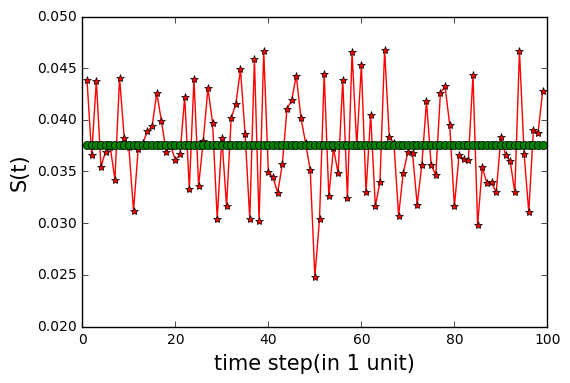

In [106]:
# -*- coding: utf-8 -*-
import random
import networkx as nx
import matplotlib.pyplot as plt

# generate powerlaw random number (Inverse Transform Method)
def powerlaw_num(v,xmin=0.01):
    x = random.random()
    return (xmin**(1-v)-(xmin**(1-v)-1)*x)**(1./(1-v))

# Generating an empty graph
def emptyGraph(N):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    return G

# Generating activity driven time-varying network in one timeslot
def init_activityDriven(N=1000, m=6):
    """"
    Parameters
    ----------
    N :   nodes
    m :   rewiring links
    """
    dt = 1    # active slot
    eta = 10  # rescaling factor , ai = eta * xi

    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        xi = powerlaw_num(3, 0.01)  # node's activated prob belongs to F(x)=x**(-3)
        if random.random() <= eta * xi * dt:
            for mi in range(m):
                j = random.choice(range(N))
                while j == i or G.has_edge(i, j):
                    j = random.choice(range(N))
                G.add_edge(i, j)
    return G  # return a graph object

# Generating T time steps time-varying activity driven networks
def temporal_activityDriven(N=1000, m=4, T=6):
    """"
    Parameters
    ----------
    N :   nodes
    m :   rewiring links
    T :   time slots
    """
    tG = {}
    for i in range(T):
        G_temp = init_activityDriven(N, m)
        tempNet = nx.to_dict_of_dicts(G_temp)
        tG[i] = tempNet
    return tG  # return a dict-like time-varying graph

def temporal_activityDriven_withMemory(N=1000, m=6, T=5, r=0):
    """"
    Parameters
    ----------
    N :   nodes
    m :   rewiring links
    T :   time slots
    r :   memory rate, keeping previous links
    """
    # initiate parameters
    # N = 100   # nodes
    # T = 1000  # time slots
    # r = 0.1   # memory rate, keeping previous links
    dt = 1    # active slot
    eta = 10  # rescaling factor , ai = eta * xi

    G0 = init_activityDriven(N, m)  # initial graph
    G1 = G0   # current timeslot graph
    tG = {0: nx.to_dict_of_dicts(G0)}  # graph dicts
    for ti in range(1, T+1):
        G2 = G1  # previous timeslot graph
        G1 = emptyGraph(N)  # current timeslot graph
        for i in range(N):
            xi = powerlaw_num(3, 0.01)  # node's activated prob belongs to F(x)=x**(-3)
#             print xi*eta
            if random.random() < eta * xi * dt:  # node i is active
#                 ki = nx.degree(G2, i)            # calculate degree of node i
                neighbors = G2.neighbors(i)      # neighbors list of node i
                # link selection of each neighbor
                if len(neighbors) > 0:
                    for neighbor in neighbors:
                        if random.random() < r:
                            # randomly keep one previous neighbor
                            j = neighbor
                            G1.add_edge(i, j)
                        else:
                            # randomly select one other node
                            # G1.remove_edge(i,neighbor)
                            j = random.choice(list(set(range(N)) - {i} - set(neighbors)))
                            count = 0
                            while G1.has_edge(i, j):
                                j = random.choice(list(set(range(N)) - {i} - set(neighbors)))
                                count += 1
                            G1.add_edge(i, j)
                else:
                    for mi in range(m):
                        j = random.choice(range(N))
                        while j == i or G1.has_edge(i, j):
                            j = random.choice(range(N))
                        G1.add_edge(i, j)
                    
        tempNet = nx.to_dict_of_dicts(G1)
        tG[ti] = tempNet
    return tG  # return a dict-like time-varying graph
################################################################################################

N = 5000
m = 2
T = 100
p = 0.1

tG = temporal_activityDriven_withMemory(N, m, T, p)
# tG = temporal_activityDriven(N, m, T)

temporalNetFile1 = nx.Graph(tG[0]) 
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_1 has %s links"%(len(temporalNetFile1.edges()))
print "network_1 has %s nodes"%(len(Net1))
print "network_1 density is:",nx.density(temporalNetFile1)

# calculate network links overlap
commonRatio = []
lastLink = link1
for i in range(1,T):    
    temporalNetFile = nx.Graph(tG[i]) 
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    print nx.density(temporalNetFile)
    templink = []
    for n, neighbors in tempNet.iteritems(): 
        for u in neighbors:
            templink.append("%s_%s"%(n,u))
#     print "network_%s has %s links"%(i,len(set(templink)))  

    tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
#     tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
    commonRatio.append(tempRatio)
    lastLink = templink

ave = sum(commonRatio)/len(commonRatio)
print 'ave:',ave
    
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'r-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'g-o')

# ax.legend(loc="best", fontsize=12)
ax.set_xlabel("time step(in 1 unit)",fontsize=15)
ax.set_ylabel("S(t)",fontsize=15)
# ax.set_yticks(np.arange(0.0,0.011,0.001))
# ax.set_xticks(np.arange(0,60,5))
plt.show()

# Find continuous interval number list

In [43]:
from itertools import groupby

lst = [2, 3, 5, 6, 7, 8, 11, 12, 13, 20]
fun = lambda (i, v): v - i    # values minused by index
for k, g in groupby(enumerate(lst), fun): # k is key, g is grouper obeject as (index,values)
#     print k,'\n',g
    a = [v for i, v in g]
    print a

[2, 3]
[5, 6, 7, 8]
[11, 12, 13]
[20]


#  Drawing link duration time distribution (HT09)

[90, 118, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 4, 3, 5, 1, 1, 1, 1, 1, 1, 3, 1, 2, 4, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 2, 1, 2, 1, 4, 3, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 5, 2, 1, 1, 2, 2, 2, 1, 2, 1, 6, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 7, 1, 2, 1, 3, 2, 1, 1, 2, 1, 4, 3, 2, 3, 2, 1, 3, 1, 10, 5, 2, 9, 6, 4, 3, 2, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 5, 3, 6, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 8, 1, 1, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 7, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 5, 6, 17, 2, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 2, 2, 4, 1, 1, 2, 1, 2, 3, 8, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 7, 1, 1, 1, 1, 10, 2, 2, 1, 2, 1, 1, 1, 16, 3, 1, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 9, 1, 3, 3, 2, 5, 5, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 8, 1, 1, 1, 1, 10, 1, 3, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1

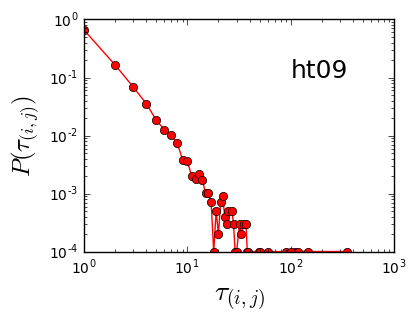

In [50]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby

DATASET = 'ht09' 

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv" % DATASET
df = pd.read_csv(datapath, header = None)

RESOLUTION = 20

t = (df[2]-df[2].min())/RESOLUTION
timestamp = [int(i) for i in t]

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

cfun = lambda (i,v): v - i 

intervalList = []
for (id1,id2), group in df.groupby([df['ID1'],df['ID2']]):
    pairID = (id1, id2)
#     print pairID
    timestampList = list(group['timestamp'])
#     print timestampList
    
    for k, g in groupby(enumerate(timestampList), cfun):
        interval = [v for i, v in g]
        intervalList.append(len(interval))
print intervalList
x = []
y = []
for i in set(intervalList):
    x.append(i)
    y.append(intervalList.count(i))
    print(i, intervalList.count(i))

# y = np.array(y)/20818.
y = np.array(y)/float(sum(y))

fig = plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)

ax.set_xlabel("$\\tau_{(i,j)}$",fontsize=20)  # in 20s
ax.set_ylabel("$P(\\tau_{(i,j)})$",fontsize=18)
# ax.set_title("link duration time distribution\n (HT09)",fontsize=15)
ax.text(100,0.1,'%s'%DATASET,fontsize=18)
plt.loglog(x,y,'r-o')

# save fig
# figpath1 = "C:\Users\CAN_LC\Desktop\HT09\FIG\linkDuration.eps"
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = "C:\Users\CAN_LC\Desktop\HT09\FIG\linkDuration.png"
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# counting accumulated link activated distribution

(1, 876)
(2, 384)
(3, 190)
(4, 125)
(5, 83)
(6, 51)
(7, 46)
(8, 28)
(9, 43)
(10, 29)
(11, 23)
(12, 17)
(13, 15)
(14, 17)
(15, 15)
(16, 14)
(17, 12)
(18, 13)
(19, 16)
(20, 8)
(21, 4)
(22, 5)
(23, 6)
(24, 9)
(25, 5)
(26, 7)
(27, 7)
(28, 1)
(29, 5)
(30, 3)
(31, 5)
(32, 3)
(33, 4)
(34, 3)
(35, 4)
(36, 3)
(37, 2)
(38, 4)
(39, 5)
(40, 2)
(41, 2)
(42, 5)
(43, 3)
(44, 2)
(46, 1)
(47, 4)
(49, 3)
(50, 7)
(51, 4)
(52, 1)
(53, 1)
(54, 1)
(56, 2)
(57, 1)
(58, 2)
(59, 5)
(60, 1)
(61, 2)
(63, 1)
(65, 1)
(67, 2)
(70, 1)
(71, 1)
(72, 1)
(76, 3)
(78, 2)
(79, 2)
(83, 1)
(84, 2)
(87, 1)
(88, 1)
(89, 1)
(90, 1)
(92, 1)
(102, 1)
(103, 1)
(105, 1)
(107, 1)
(111, 1)
(112, 1)
(116, 1)
(117, 2)
(120, 2)
(121, 1)
(122, 1)
(133, 1)
(135, 1)
(142, 1)
(157, 1)
(159, 2)
(169, 1)
(170, 1)
(187, 1)
(188, 1)
(206, 1)
(216, 1)
(231, 1)
(236, 1)
(248, 1)
(253, 1)
(1281, 1)
(270, 1)
(291, 1)
(304, 1)
(338, 1)
(353, 1)
[876, 384, 190, 125, 83, 51, 46, 28, 43, 29, 23, 17, 15, 17, 15, 14, 12, 13, 16, 8, 4, 5, 6, 9, 5, 7, 7, 

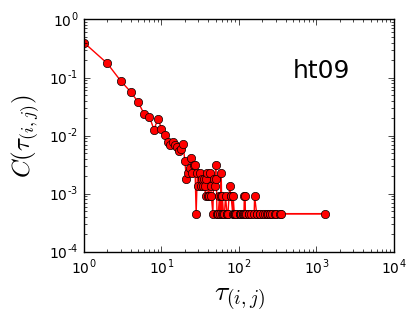

In [47]:
# counting accumulated link activated distribution
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

DATASET = 'ht09' 

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv" % DATASET
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

cfun = lambda (i,v): v - i 

intervalList = []
activatedLinkList = []
for (id1,id2), group in df.groupby([df['ID1'],df['ID2']]):
    pairID = (id1, id2)
#     print pairID
    timestampList = list(group['timestamp'])
#     print timestampList
    activatedLinkList.append(len(timestampList))
    
# print "total list is\n",activatedLinkList
x1 = []
y1 = []
for i in set(activatedLinkList):
    x1.append(i)
#     print i
    y1.append(activatedLinkList.count(i))
    print(i,activatedLinkList.count(i))
print y1    

# y = np.array(y1)/20818.
y = np.array(y1)/float(sum(y1))

fig = plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)

ax.set_xlabel("$\\tau_{(i,j)}$",fontsize=20)  # in 20s
ax.set_ylabel("$C(\\tau_{(i,j)})$",fontsize=18)
# ax.set_title("link duration time distribution\n (HT09)",fontsize=15)
ax.text(500,0.1,'%s'%DATASET,fontsize=18)
plt.loglog(x1,y,'r-o')

# save fig
# figpath1 = "C:\Users\CAN_LC\Desktop\HT09\FIG\linkDuration_accum.eps"
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = "C:\Users\CAN_LC\Desktop\HT09\FIG\linkDuration_accumu.png"
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Drawing node duration time distribution (HT09)

[3, 7, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 4, 1, 1, 1, 2, 2, 3, 2, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 1, 10, 7, 1, 1, 1, 1, 7, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 5, 6, 17, 2, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 2, 2, 4, 1, 1, 2, 1, 2, 3, 8, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 7, 1, 1, 1, 1, 10, 2, 2, 1, 2, 1, 1, 1, 16, 3, 1, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 9, 1, 3, 3, 2, 5, 5, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 8, 1, 1, 1, 1, 10, 1, 3, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 2, 6, 5, 1, 1, 1, 1, 2, 1, 3, 1, 1, 90, 118, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 22, 22, 1, 2, 1, 9, 7, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 2, 1, 2, 4, 3, 5, 1, 1, 1, 1, 1, 1, 3, 1, 2, 4, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 2, 1, 2, 1, 4, 3, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 5, 2, 1, 1, 2,

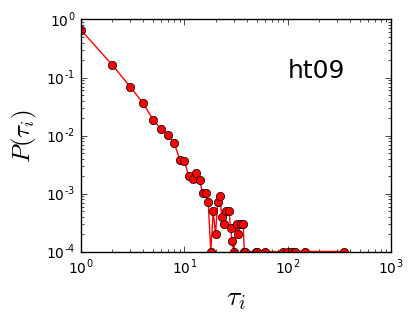

In [53]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

DATASET = 'ht09' 

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv" % DATASET
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']
# print df

df1 = df[['ID1', 'timestamp']]
df2 = df[['ID2', 'timestamp']]
df1.columns = ["ID",'timestamp']
df2.columns = ["ID",'timestamp']
df = df1.append(df2,ignore_index=True)
# print df

cfun = lambda (i,v): v - i 

nodeintervalList = []
# activatedList = []
for key, group in df.groupby(df['ID']):
    pairID = key                              # node id
#     print pairID   
    timestampList = list(group['timestamp'])  # activated time of node
#     print timestampList
#     activatedList.append(len(timestampList))
    
# print "total list is\n",activatedList
# x1 = []
# y1 = []
# for i in set(activatedList):
#     x1.append(i)
#     y1.append(activatedList.count(i))
#     print(i,activatedList.count(i))
    
    for k, g in groupby(enumerate(timestampList), cfun):
        interval = [v for i, v in g]
        nodeintervalList.append(len(interval))
print nodeintervalList
x2 = []
y2 = []
for i in set(nodeintervalList):
    x2.append(i)
    y2.append(nodeintervalList.count(i))
    print(i, nodeintervalList.count(i))

y2 = np.array(y2)/float(sum(y2))

fig = plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)

ax.set_xlabel("$\\tau_i$",fontsize=20)  # in 20s
ax.set_ylabel("$P(\\tau_i)$",fontsize=18)
# ax.set_title("node duration time distribution\n (HyperText09)",fontsize=15)
ax.text(100,0.1,'%s'%DATASET,fontsize=18)
plt.loglog(x2,y2,'r-o')

# # save fig
# figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\nodeDuration.eps"
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\nodeDuration.png"
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# counting accumulated node activated distribution

[1483, 1483, 1383, 1298, 1113, 1056, 984, 962, 871, 793, 777, 749, 743, 703, 702, 689, 688, 672, 657, 655, 651, 642, 602, 584, 581, 569, 556, 546, 534, 532, 532, 504, 479, 473, 451, 430, 417, 414, 411, 407, 407, 361, 348, 340, 339, 337, 331, 326, 325, 322, 311, 298, 297, 296, 294, 289, 287, 285, 284, 265, 262, 253, 252, 248, 229, 218, 218, 217, 214, 192, 191, 191, 172, 172, 172, 167, 164, 160, 152, 148, 147, 144, 141, 140, 134, 120, 116, 114, 107, 104, 98, 96, 93, 84, 82, 79, 77, 63, 55, 53, 50, 48, 47, 44, 43, 40, 37, 37, 35, 35, 31, 30, 2]
1.0


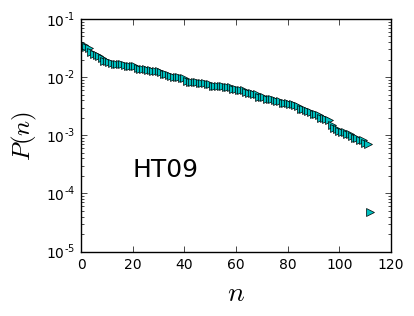

In [55]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

DATASET = 'ht09' 

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv" % DATASET
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']
# print df

df1 = df[['ID1', 'timestamp']]
df2 = df[['ID2', 'timestamp']]
df1.columns = ["ID",'timestamp']
df2.columns = ["ID",'timestamp']
df = df1.append(df2,ignore_index=True)
# print df

cfun = lambda (i,v): v - i 

nodeintervalList = []
activatedNodeList = []
for key, group in df.groupby(df['ID']):
    pairID = key                              # node id
#     print pairID   
    timestampList = list(group['timestamp'])  # activated time of node
#     print timestampList
    activatedNodeList.append(len(timestampList))
    
# print "total list is\n",activatedNodeList
# x2 = []
# y2 = []
# for i in set(activatedNodeList):
#     x2.append(i)
#     y2.append(activatedNodeList.count(i))
#     print(i,activatedNodeList.count(i))
activatedNodeList.sort(reverse=True)
print activatedNodeList
# plt.semilogy(range(len(activatedNodeList)),activatedNodeList, 'go')
#     for k, g in groupby(enumerate(timestampList), cfun):
#         interval = [v for i, v in g]
#         nodeintervalList.append(len(interval))
# print nodeintervalList
# x2 = []
# y2 = []
# for i in set(nodeintervalList):
#     x2.append(i)
#     y2.append(nodeintervalList.count(i))
#     print(i, nodeintervalList.count(i))

y2 = np.array(activatedNodeList)/float(sum(activatedNodeList))
print sum(y2)
fig = plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)

ax.set_xlabel("$n$",fontsize=20)  # in 20s
ax.set_ylabel("$P(n)$",fontsize=18)
# ax.set_title("node duration time distribution\n (HyperText09)",fontsize=15)
ax.text(20,0.0002,'HT09',fontsize=18)
# plt.semilogy(x2,y2,'ro')
plt.semilogy(range(len(y2)),y2, 'c>')

# # save fig
# figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\nodeDuration_accum.eps"
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\nodeDuration_accum.png"
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Drawing link duration time distribution (HT09)                                                      (Time Shuffle) (Random Times) (Contact Shuffle)

In [176]:
# generate n random integers list within [a,b]
def generate_N(a,b,N):
    """"
    Parameters
    ----------
    N :   number amount
    a :   start
    b ：  stop
    """
    numList = []
    for i in range(N):
        import random
        num = random.randint(a,b)
        numList.append(num)
    return numList

a = min(timestamp)
b = max(timestamp)
N = len(timestamp)
t = generate_N(a,b,N)

# print a
# print b
# print N
# print t

(1, 50316)
(2, 158)


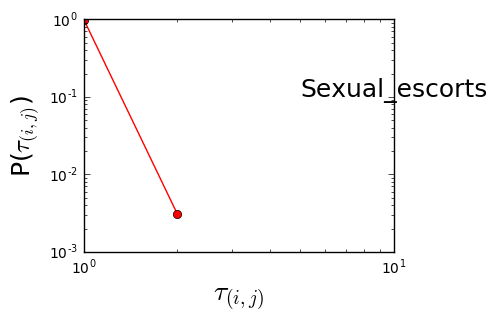

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

DATASET = 'Sexual_escorts' 

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv" % DATASET
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]  # normalize timestamp list

# random.shuffle(df[0])                                                  # rewire contact sequence
# random.shuffle(df[1])   
# timestamp = generate_N(min(timestamp), max(timestamp), len(timestamp))   # random times (RT)
random.shuffle(timestamp)                                              # randomly permuted time (RP)

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

# calculate continuous time duration size
cfun = lambda (i,v): v - i 
intervalList = []
for (id1,id2), group in df.groupby([df['ID1'],df['ID2']]):
    pairID = (id1, id2)
#     print pairID
    timestampList = list(group['timestamp'])
#     print timestampList
    
    for k, g in groupby(enumerate(timestampList), cfun):
        interval = [v for i, v in g]
        intervalList.append(len(interval))
# print intervalList
x = []
y = []
for i in set(intervalList):
    x.append(i)
    y.append(intervalList.count(i))
    print(i, intervalList.count(i))

y = np.array(y)/float(sum(y))

fig = plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)

ax.set_xlabel("$\\tau_{(i,j)}$",fontsize=20)  # in 20s
ax.set_ylabel("P($\\tau_{(i,j)}$)",fontsize=18)
# ax.set_title("node duration time distribution\n (HyperText09)",fontsize=15)
ax.text(5,0.1,'%s'%DATASET,fontsize=18)
plt.loglog(x,y,'r-o')

# save fig
# figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\linkDurationRP.eps"
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\linkDurationRP.png"
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Drawing node duration time distribution (HT09)                                                      (Time Shuffle) (Random Times) (Contact Shuffle)

(1, 40644)
(2, 478)
(3, 12)


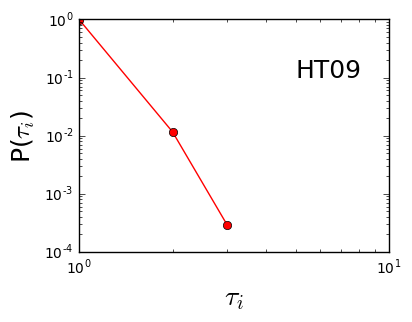

In [46]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

DATASET = 'Sexual_escorts' 

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv" % DATASET
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]

random.shuffle(df[0])                                                  # rewire contact sequence
random.shuffle(df[1])
# timestamp = generate_N(min(timestamp), max(timestamp), len(timestamp))   # random times (RT)
# random.shuffle(timestamp) 

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']
# print df

df1 = df[['ID1', 'timestamp']]
df2 = df[['ID2', 'timestamp']]
df1.columns = ["ID",'timestamp']
df2.columns = ["ID",'timestamp']
df = df1.append(df2,ignore_index=True)
# print df

cfun = lambda (i,v): v - i 

nodeintervalList = []
# activatedList = []
for key, group in df.groupby(df['ID']):
    pairID = key                              # node id
#     print pairID   
    timestampList = list(group['timestamp'])  # activated time of node
#     print timestampList
#     activatedList.append(len(timestampList))
    
# print "total list is\n",activatedList
# x1 = []
# y1 = []
# for i in set(activatedList):
#     x1.append(i)
#     y1.append(activatedList.count(i))
#     print(i,activatedList.count(i))
    
    for k, g in groupby(enumerate(timestampList), cfun):
        interval = [v for i, v in g]
        nodeintervalList.append(len(interval))
# print nodeintervalList
x2 = []
y2 = []
for i in set(nodeintervalList):
    x2.append(i)
    y2.append(nodeintervalList.count(i))
    print(i, nodeintervalList.count(i))

y2 = np.array(y2)/float(sum(y2))

fig = plt.figure(figsize=(4,3))
ax=fig.add_subplot(1,1,1)

ax.set_xlabel("$\\tau_i$",fontsize=20)  # in 20s
ax.set_ylabel("P($\\tau_i$)",fontsize=18)
# ax.set_title("node duration time distribution\n (HyperText09)",fontsize=15)
ax.text(5,0.1,'HT09',fontsize=18)
plt.loglog(x2,y2,'r-o')

# # save fig
figpath1 = r"C:\Users\CAN_LC\Desktop\%s\FIG\nodeDurationRC.eps"%DATASET
plt.savefig(figpath1,dpi=400,bbox_inches='tight')
figpath2 = r"C:\Users\CAN_LC\Desktop\%s\FIG\nodeDurationRC.png"%DATASET
plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

#  Slice Temporal Networks (HT09) (window = 1,3,6,10,15,30 min, 1h)

In [79]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

datapath = r"C:\Users\CAN_LC\Desktop\ht09.csv"
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]  # normalize timestamp list
df[2] = timestamp

df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs
df.sort_values('timestamp', inplace=True)  # sorted by timestamp

windowSize = 3 * 5    # time window: 20s*3 = 1 minute

for i in range(df['timestamp'].max()/windowSize):
    print "i is",i
    temp = df[df['timestamp']>= i*windowSize]
    data = temp[temp['timestamp']< (i+1)*windowSize]
    
    count =  data.groupby([data['ID1'],data['ID2']]).size()  # (ID1, ID2, weight)
    print count
    datapath = r"C:\Users\CAN_LC\Desktop\HT09\%s_minute\%s.csv"%(windowSize/3, i)  # write weighted net into a csv file
#     datapath = r"C:\Users\CAN_LC\Desktop\HT09\1_minute\%s.csv"%(i)  # write weighted net into a csv file
    count.to_csv(datapath)

N = df['timestamp'].max()/windowSize
print 'N is',N
taildata = df[df['timestamp']>= N * windowSize]
tailcount =  taildata.groupby([taildata['ID1'],taildata['ID2']]).size()  # (ID1, ID2, weight)
print "tail net is:\n",tailcount

taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\%s_minute\%s.csv"%(windowSize/3, N)  # write weighted net into a csv file
# taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\1_minute\%s.csv"%(N)  # write weighted net into a csv file
tailcount.to_csv(taildatapath)

i is 0
ID1  ID2
1    2      15
dtype: int64
i is 1
ID1  ID2
1    2      15
dtype: int64
i is 2
ID1  ID2
1    2      15
dtype: int64
i is 3
ID1  ID2
1    2      15
dtype: int64
i is 4
ID1  ID2
1    2      15
dtype: int64
i is 5
ID1  ID2
1    2      15
dtype: int64
i is 6
ID1  ID2
1    2      10
dtype: int64
i is 7
ID1  ID2
1    2      15
3    4       1
dtype: int64
i is 8
ID1  ID2
1    2      15
dtype: int64
i is 9
ID1  ID2
1    2      15
dtype: int64
i is 10
ID1  ID2
1    2      15
dtype: int64
i is 11
ID1  ID2
1    2      15
dtype: int64
i is 12
ID1  ID2
1    2      15
3    4       7
dtype: int64
i is 13
ID1  ID2
1    2      15
     3       5
     4       1
2    3       3
     4       1
dtype: int64
i is 14
ID1  ID2
1    2       3
     3      10
2    3       2
     4       2
3    4       2
     5       2
dtype: int64
i is 15
ID1  ID2
1    2      1
     3      4
     4      3
     6      1
     8      4
2    4      3
     6      2
     8      1
3    4      3
     6      5
     7      1

# Slice Temporal Networks (Sexual) (window = 1,7,30 day)

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

DATASET = 'Sexual_escorts' 

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv" % DATASET
df = pd.read_csv(datapath, header = None)

RESOLUTION = 1

t = (df[2]-df[2].min())/RESOLUTION
timestamp = [int(i) for i in t]  # normalize timestamp list
df[2] = timestamp

df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs
df.sort_values('timestamp', inplace=True)  # sorted by timestamp

windowSize = 1 * 30    # time window: 1 day * n = n days

for i in range(df['timestamp'].max()/windowSize):
    print "i is",i
    temp = df[df['timestamp']>= i*windowSize]
    data = temp[temp['timestamp']< (i+1)*windowSize]
    
    count =  data.groupby([data['ID1'],data['ID2']]).size()  # (ID1, ID2, weight)
    print count
    datapath = r"C:\Users\CAN_LC\Desktop\%s\1_month\%s.csv"%(DATASET, i)  # write weighted net into a csv file
#     datapath = r"C:\Users\CAN_LC\Desktop\HT09\1_minute\%s.csv"%(i)  # write weighted net into a csv file
    count.to_csv(datapath)

N = df['timestamp'].max()/windowSize
print 'N is',N
taildata = df[df['timestamp']>= N * windowSize]
tailcount =  taildata.groupby([taildata['ID1'],taildata['ID2']]).size()  # (ID1, ID2, weight)
print "tail net is:\n",tailcount

taildatapath = r"C:\Users\CAN_LC\Desktop\%s\1_month\%s.csv"%(DATASET, N)  # write weighted net into a csv file
# taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\1_minute\%s.csv"%(N)  # write weighted net into a csv file
tailcount.to_csv(taildatapath)

i is 0
ID1  ID2
0    1      1
     4      1
2    1      1
3    1      1
dtype: int64
i is 1
ID1  ID2
5    6      1
dtype: int64
i is 2
ID1  ID2
5    6      1
dtype: int64
i is 3
ID1  ID2
7    8      1
dtype: int64
i is 4
ID1  ID2
9    10     1
11   12     1
13   12     1
dtype: int64
i is 5
ID1  ID2
7    14     1
15   16     1
17   12     1
18   19     1
     20     1
21   19     1
dtype: int64
i is 6
ID1  ID2
17   28     1
18   29     1
     30     1
21   16     1
22   23     1
24   25     1
26   27     1
31   32     1
dtype: int64
i is 7
ID1  ID2
0    12     1
     34     1
18   29     1
21   33     1
35   36     1
dtype: int64
i is 8
ID1  ID2
0    43     1
     45     1
17   45     1
37   38     1
39   40     1
41   42     2
44   34     1
46   40     1
47   30     1
48   43     1
     49     1
dtype: int64
i is 9
ID1  ID2
0    55     1
21   50     1
     52     1
24   51     1
31   45     1
35   50     1
41   54     1
44   53     1
46   58     1
56   54     1
     57     1
59   60  

# Construct & Visualize Aggregated Aggregated Networks (HT09)

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

DATASET = 'Sexual_escorts'

datapath = r"C:\Users\CAN_LC\Desktop\%s.csv"%DATASET
df = pd.read_csv(datapath, header = None)
df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs
  
count =  df.groupby([df['ID1'],df['ID2']]).size()  # (ID1, ID2, weight)

datapath = r"C:\Users\CAN_LC\Desktop\%s\aggregatedNet.csv"%DATASET   # write weighted net into a csv file
count.to_csv(datapath)
print('Temporal networks have been aggregated!')

Temporal networks have been aggregated!


In [6]:
# visualize aggregated network
aggreNetPath =  r"C:\Users\CAN_LC\Desktop\%s\aggregatedNet.csv"%DATASET
aggreG = construct_Net(aggreNetPath)

print "Network has %s nodes" % len(aggreG.nodes())
print "Network has %s edges" % len(aggreG.edges())
print nx.number_connected_components(aggreG)
# nx.draw(aggreG,pos=nx.spectral_layout(aggreG))  # spectral_layout
# plt.show()

Network has 16730 nodes
Network has 39044 edges
418


[0, 7515, 2796, 1518, 999, 668, 481, 414, 313, 215, 201, 162, 128, 133, 119, 83, 77, 85, 77, 64, 35, 38, 55, 30, 38, 36, 24, 29, 25, 23, 19, 22, 18, 18, 15, 12, 15, 9, 12, 10, 5, 7, 7, 7, 6, 3, 8, 11, 7, 8, 6, 0, 1, 6, 5, 4, 6, 6, 6, 2, 2, 0, 1, 5, 1, 1, 2, 4, 4, 1, 3, 1, 1, 2, 4, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 3, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


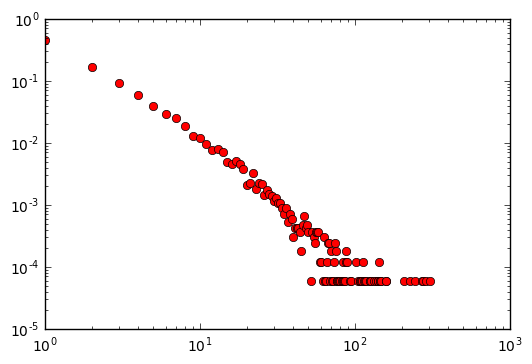

In [7]:
# plot degree distribution of aggregated network
degree = nx.degree_histogram(aggreG)
print degree
x = range(len(degree))
y = [z/float(sum(degree)) for z in degree]
plt.loglog(x,y,'ro')
plt.show()

#  Visualize each network slice (HT09) (window = 1,3,6,10,15,30 min, 1h)

Network has 2 nodes
Network has 1 edges
1


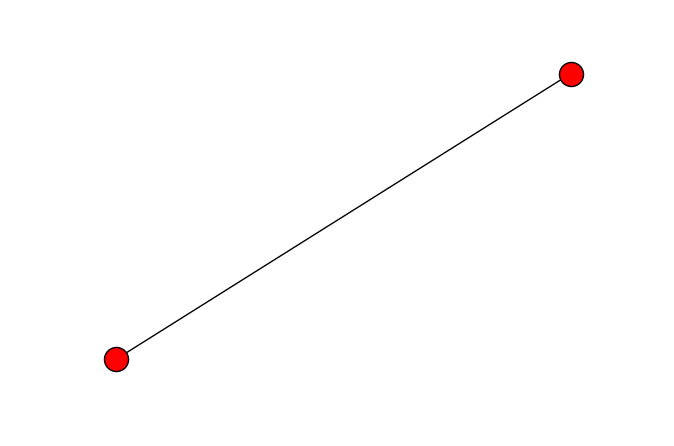

In [25]:
import networkx as nx
datapath = r"C:\Users\CAN_LC\Desktop\HT09\5_minute\1.csv"
def construct_Net(datapath):
    G = nx.empty_graph()
    try:
        contact = pd.read_csv(datapath, header = None)
        source = list(contact[0])
        target = list(contact[1])
        for i in range(len(source)):
            G.add_edge(source[i],target[i])
        return G
    except:
        print "empty net!"
        return G

G = construct_Net(datapath)

print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.number_connected_components(G)
nx.draw(G,pos=nx.spring_layout(G))

plt.show()

# Calculate neighbor network link overlap (HT09) (window = 1,3,6,15,30 min, 1h)

network_0 has 1 links
network_0 has 2 nodes
network_0 density is: 1.0
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
totally 37 empty net
ave is 0.111530612562


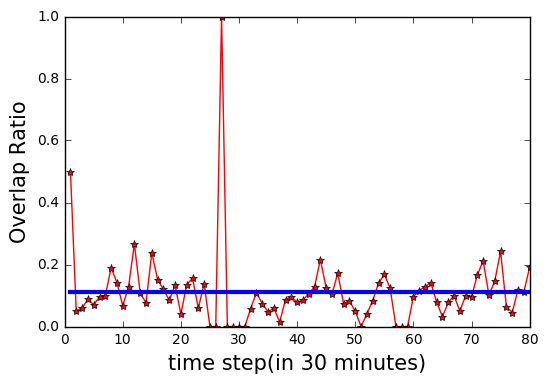

In [40]:
resolution = 30
netName = '%s_minute'%resolution
netN = 10617/(3*resolution)+1
DATASET = 'HT09'

datapath = r"C:\Users\CAN_LC\Desktop\%s\%s\0.csv" %(DATASET, netName)
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(1,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\%s\%s\%s.csv" %(DATASET,netName,i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
#         print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
#         print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'r-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'b-',linewidth=3)

# ax.legend(loc="best", fontsize=12)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_xlabel("time step(in %s minutes)"%resolution,fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
# ax.set_yticks(np.arange(0,0.41,0.05))
# ax.set_xticks(np.arange(0,50,2))

# # save fig
# figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap.eps"%resolution
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap.png"%resolution
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Calculate neighbor network link overlap (Sexual) (window = 1,7,30 day)

network_0 has 31 links
network_0 has 48 nodes
network_0 density is: 0.0274822695035
totally 0 empty net
[0.012048192771084338, 0.018018018018018018, 0.04285714285714286, 0.007633587786259542, 0.009009009009009009, 0.03468208092485549, 0.03211009174311927, 0.028455284552845527, 0.02147239263803681, 0.014164305949008499, 0.012224938875305624, 0.018832391713747645, 0.02268760907504363, 0.03198653198653199, 0.028481012658227847, 0.02924791086350975, 0.026905829596412557, 0.0374384236453202, 0.03232323232323232, 0.0392156862745098, 0.032873806998939555, 0.02516940948693127, 0.04253393665158371, 0.0365025466893039, 0.04048582995951417, 0.040912667191188044, 0.042212518195050945, 0.04482758620689655, 0.03455425017277125, 0.03198031980319803, 0.029808773903262094, 0.04006968641114982, 0.03379601689800845, 0.02452153110047847, 0.03534430225472273, 0.02768166089965398, 0.044420941300899, 0.04060385216033316, 0.03763440860215054, 0.042322300596852956, 0.038980509745127435, 0.03749406739439962, 0.

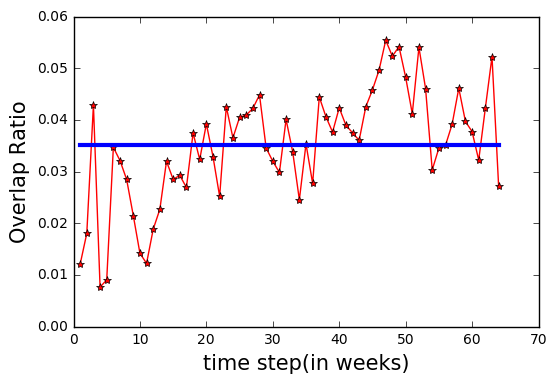

In [36]:
DATASET = 'Sexual_escorts'
windowSize = 30  
netN = 2232/windowSize + 1

datapath = r"C:\Users\CAN_LC\Desktop\%s\1_month\10.csv" %(DATASET)
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(11,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\%s\1_month\%s.csv" %(DATASET, i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
#         print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
#         print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   
print commonRatio
ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'r-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'b-',linewidth=3)

# ax.legend(loc="best", fontsize=12)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_xlabel("time step(in weeks)",fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
# ax.set_yticks(np.arange(0,0.41,0.05))
# ax.set_xticks(np.arange(0,50,2))

# # save fig
# figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap.eps"%resolution
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap.png"%resolution
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Plotting Similarity vs Density Curve

network_0 has 1 links
network_0 has 2 nodes
network_0 density is: 1.0
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty net!
empty 

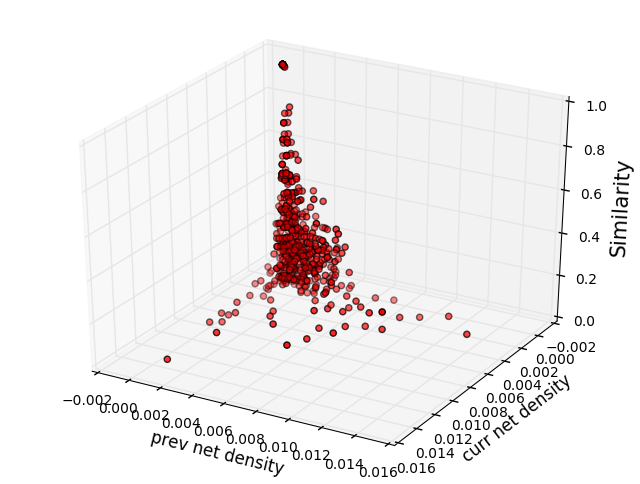

In [68]:
datapath = r"C:\Users\CAN_LC\Desktop\HT09\1_minute\0.csv" 
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
densityX = []
densityY = []
for i in range(1,1180):    
    tempPath = r"C:\Users\CAN_LC\Desktop\HT09\3_minute\%s.csv" %i
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
#         print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
#         print 'density:',len(templink)/float(113*112)   # take all nodes into consideration
#         density.append(len(templink)/float(113*112))
#         density.append(len(set(lastLink) & set(templink))/float(113*112))
#         density.append((len(templink)*len(lastLink))**0.5/(113*112))
        densityX.append(len(lastLink)/float(113*112))
        densityY.append(len(templink)/float(113*112))
    
        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

# ave = sum(commonRatio)/len(commonRatio)
# print "ave is",ave

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

# print 'densityX:\n',densityX
# print 'densityY:\n',densityY
# print 'commonRatio:\n',commonRatio
ax.scatter(densityX, densityY, commonRatio, c= 'b', marker='o')

ax.set_xlabel("prev net density",fontsize=12)
ax.set_ylabel("curr net density",fontsize=12)
ax.set_zlabel("Similarity",fontsize=15)
# ax.set_xlim(0,0.021,0.005)  # (0,0.008,0.002) (0,0.05,0.01)
# ax.set_ylim(0,0.021,0.005)
ax.set_zlim(0,1,0.2)
plt.gca().invert_yaxis()

# fig = plt.figure(figsize=(6,4))
# ax = plt.subplot(111)
# # print commonRatio
# # ax.plot(range(1,len(commonRatio)+1),commonRatio,'r-*')
# # ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'g-o')
# ax.plot(density,commonRatio, 'co')

# # ax.legend(loc="best", fontsize=12)
# ax.set_xlabel("density",fontsize=15)
# ax.set_ylabel("Similarity",fontsize=15)
# # ax.set_yticks(np.arange(0,0.41,0.05))
# # ax.set_xticks(np.arange(0,50,2))

# save fig
figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\density_overlap.eps"
plt.savefig(figpath1,dpi=400,bbox_inches='tight')
figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\density_overlap.png"
plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()